In [7]:
import cv2
import numpy as np

In [8]:
def process_img(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5),19)
    th3 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
    ret, res = cv2.threshold(th3, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    #####################################Edge Detection
    # Calculate the median pixel value
    med_val = np.median(res)  
    # Lower bound is either 0 or 70% of the median value, whicever is higher
    lower = int(max(0, 0.7* med_val))
    # Upper bound is either 255 or 30% above the median value, whichever is lower
    upper = int(min(255,1.3 * med_val))
    blurred_img = cv2.medianBlur(res,1)
    edges = cv2.Canny(image=blurred_img, threshold1=lower-200 , threshold2=upper-80)
    ################################Bilateral Filter################
    edges = cv2.bilateralFilter(edges,9,75,75)
    ###############################################
    #Noise Removal
    kernel = np.ones((3,3),np.uint8)
    closing = cv2.morphologyEx(edges,cv2.MORPH_CLOSE,kernel, iterations = 2)
    #Dilation
    kernel = np.ones((5,5),np.uint8)
    dilation = cv2.dilate(closing,kernel,iterations = 1)
    #Erosion
    kernel = np.ones((3,3),np.uint8)
    erosion = cv2.erode(dilation,kernel,iterations = 1)
    ret, res = cv2.threshold(erosion, 0, 255,  cv2.THRESH_BINARY_INV)
    return res

In [3]:
img = cv2.imread("./DataCollected/Test/A/1.jpg")

In [4]:
type(img)

numpy.ndarray

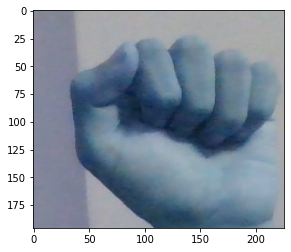

In [6]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [9]:
img = process_img(img)

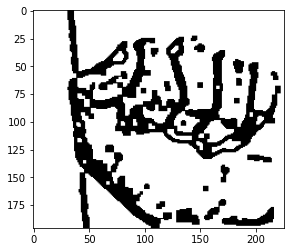

In [11]:
plt.imshow(img,'gray')